In [6]:
import gymnasium as gym


In [15]:
env = gym.make("Taxi-v3")
env.observation_space.n

np.int64(500)

In [16]:
env.reset()
env.step(1)

(146,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

In [18]:
list(env.unwrapped.decode(499))
#env.unwrapped.decode(200)

[4, 4, 4, 3]

In [19]:
print(env.spec.max_episode_steps)


200


In [7]:
env2 = gym.make("LunarLander-v3",continuous=False, gravity=-10.0,
               enable_wind=False, wind_power=15.0, turbulence_power=1.5)
print(env2.spec.max_episode_steps)

1000


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class QNetwork(nn.Module):
    """Define Neural Network Architecture"""

    def __init__(self, state_size, action_size,seed):
        """
        state_size (int): Dimension of each state
        action_size (int): Dimension of each action
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size,32)
        self.fc2 = nn.Linear(32, 64)        
        self.fc3 = nn.Linear(64, 64)       
        self.fc4 = nn.Linear(64, action_size) 


    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

In [5]:
qnetwork_local = QNetwork(8, 3, 15)
#qnetwork_local.parameters()
for param in qnetwork_local.parameters():
    print(param) 


Parameter containing:
tensor([[-0.1433, -0.1580,  0.2103, -0.0800,  0.2949, -0.0619,  0.0381,  0.0457],
        [ 0.0019, -0.1976,  0.1273, -0.0792, -0.1306,  0.0059,  0.3150, -0.1408],
        [ 0.0748, -0.1415,  0.3353, -0.1118,  0.2922, -0.1281,  0.0860,  0.0116],
        [ 0.1768, -0.3352,  0.0870, -0.3409,  0.0794, -0.2602,  0.2835, -0.0797],
        [ 0.2222,  0.1518,  0.3230, -0.1348, -0.2884,  0.2470, -0.1704, -0.2842],
        [ 0.0899,  0.2108, -0.0470, -0.1106,  0.1348, -0.0886, -0.2054,  0.0198],
        [-0.0091, -0.3113,  0.3039, -0.0902, -0.3406, -0.1557, -0.3084,  0.0890],
        [-0.1852,  0.2162,  0.2244, -0.0363,  0.0309,  0.1640,  0.1151,  0.2644],
        [-0.0703, -0.2135, -0.1639, -0.0362, -0.0051,  0.1613,  0.0266,  0.0907],
        [ 0.0109,  0.2561, -0.1909, -0.0250,  0.3165, -0.1935,  0.3426,  0.3378],
        [-0.0746,  0.3496,  0.0345,  0.1119, -0.3163,  0.1843, -0.2874,  0.3419],
        [-0.0250,  0.2004,  0.2617,  0.1348,  0.3213, -0.1288,  0.2641,  0.3

In [9]:
#sample_state=env2.observation_space.sample()

import numpy as np
sample_state=[]
for i in range(5):
    sample_state.append(env2.observation_space.sample())
sample_state=np.array(sample_state)

In [19]:
env2.action_space.sample()

np.int64(2)

In [27]:
qnetwork_local.forward(torch.from_numpy(sample_state))

tensor([[ 0.1665,  0.0769,  0.1358],
        [ 0.0357, -0.0184,  0.1648],
        [ 0.0589,  0.1599,  0.2950],
        [-0.0412,  0.2407,  0.2742],
        [ 0.0691, -0.0224, -0.0169]], grad_fn=<AddmmBackward0>)

In [6]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
torch.cuda.is_available()

True

In [7]:
device

device(type='cuda')

In [10]:
ss=torch.from_numpy(sample_state).to(device)

In [34]:
qnetwork_local.forward(ss)   #good error for learning :)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [12]:
qnetwork_local.to(device)

QNetwork(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
)

In [13]:
out=qnetwork_local.forward(ss) 

In [44]:
out.data # dont do this 

RuntimeError: CUDA error: unknown error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [14]:
out_c=out.detach().cpu().numpy()

In [16]:
np.max(out_c,axis=1)

array([0.04400751, 0.11203299, 0.37916368, 0.14753947, 0.317545  ],
      dtype=float32)

In [17]:
mc=np.min(out_c,axis=1)
mxc=np.max(out_c,axis=1)
loss = np.sum(abs(mxc-mc))

In [18]:
loss

np.float32(1.0858302)

In [42]:
import random
random.choice(np.arange(5))

np.int64(3)

In [19]:
#torch.cuda.empty_cache()
env2.spec.max_episode_steps

1000

In [20]:
env2.observation_space

AttributeError: 'Box' object has no attribute 'n'

In [16]:
out

tensor([[-0.0021,  0.0660,  0.1187],
        [-0.0509, -0.0092, -0.0011],
        [ 0.1364,  0.0084,  0.1252],
        [ 0.1229,  0.0507,  0.0945],
        [ 0.1234,  0.0906, -0.1595]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [17]:
out.max(1)[0]

tensor([ 0.1187, -0.0011,  0.1364,  0.1229,  0.1234], device='cuda:0',
       grad_fn=<MaxBackward0>)

/root/anaconda3/envs/ail722/lib/python3.9/site-packages/gymnasium/envs/box2d/lunar_lander.py:672: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("LunarLander-v3", render_mode="rgb_array")
  gym.logger.warn(


TypeError: Image data of dtype object cannot be converted to float

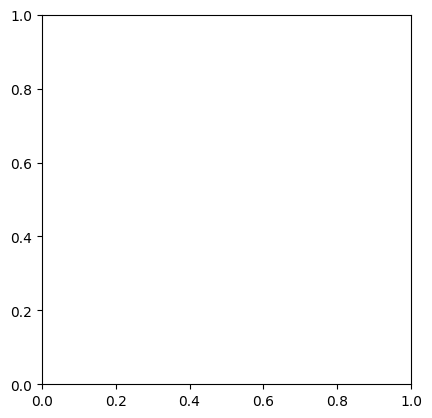

: 

In [20]:
import matplotlib.pyplot as plt
state,_=env2.reset()
image = env2.render()
plt.imshow(image)

In [2]:
import torch
import numpy as np
ls = [0,1,2]
ts=torch.tensor(ls)
ts=ts.unsqueeze(1)
qval= torch.tensor([[1,2,3] ,
                [4,5,6],
                [7,8,9]])
qval.gather(0,ts)

tensor([[1],
        [4],
        [7]])

In [4]:
torch.cuda.is_available()
#torch.cuda.get_device_name(0)

True